In [1]:
%matplotlib inline

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import os

In [3]:
os.chdir('/mnt/myParts/sda2/CollegeWork/Specialization/')

In [4]:
def showImage(img, title=None):
    plt.figure(figsize=(8,8))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(img)

In [5]:
# Input Color Image

img = cv2.imread('lenaColor1.png')[:,:,::-1]
ref = cv2.imread('bugsbunny.jpeg')[:,:,::-1]

In [6]:
len(np.stack((img[:,:,0].flatten(), img[:,:,1].flatten()), axis = 1))

360000

In [170]:

#Polynomial chaotic system
# def chaos(x0 = 0.2, w0 = 3.57, e0 = 2.1, itr = 50):
#     W = [w0]
#     E = [e0]

#     for i in range(1,9):
#         W.append((i+1)*W[0])
#     for i in range(1,4):
#         E.append(E[0])

#     print(W)
#     print(E)

#     X = [x0]

#     for i in range(itr):
#         xMul = X[i]*(1-X[i])
#         L = [j*xMul for j in E]
#         nex = L[0]
#         for j in range(1,4):
#             for k in range(j+1):
#                 ind = int(k+(((j-1)*(j+2))/2))
#                 nex += W[ind]*(L[k]**(j+1-k))
#         X.append(nex%1)
#     return X
# def chaos(x0 = 0.2, w0 = 3.57, e0 = 2.1, itr = 50):
#     W = np.arange(1,10,1)*w0
#     E = np.ones(4)*e0
#     X = [x0]
#     for i in range(itr):
#         xMul = X[i]*(1-X[i])
#         L = E*xMul
#         nex = L[0]
#         for j in range(1,4):
#             for k in range(j+1):
#                 ind = int(k+(((j-1)*(j+2))/2))
#                 nex += W[ind]*(L[k]**(j+1-k))
#         X.append(nex%1)
#     return X
# def chaos(x0 = 0.2, w0 = 3.57, e0 = 2.1, itr = 50):
#     W = np.arange(1,10,1)*w0
#     E = np.ones(4)*e0
#     X = [x0]
#     for i in range(itr):
#         xMul = X[i]*(1-X[i])
#         L = E*xMul
#         LL = np.ones(10)
#         LL[0] = L[0]
#         for i in range(1,4):
#             j = ((i-1)*(i+2))//2 + 1
#             LL[j:j+i+1] = LL[j-i:j+1]*L[:i+1]
#         nex = L[0] + np.sum(W*LL[1:])
#         X.append(nex%1)
#     return X

def cobwebfunc(W,E,LL,powr,x):
    xMul = x*(1-x)
    res = np.power(np.multiply(LL.reshape(9,1), xMul), powr.reshape(9,1))
    return np.mod(E[0]*xMul + np.dot(W, res), 1)

def cobwebPlot(x0=0.2, w0=2.1, e0=3.8, itr=50, ax=None):
    W = np.arange(1,10,1)*w0
    E = np.ones(4)*e0
    LL = np.hstack((E[:2], E[:3], E))
    powr = np.array([2,1,3,2,1,4,3,2,1])
    
    # f, ax = plt.subplots(figsize=(5,5))
    
    t = np.linspace(0, 1, itr)
    ax.plot(t, cobwebfunc(W,E,LL,powr,t), 'k')
    
    ax.plot(t, t, "k:")
    
    x, y = x0, cobwebfunc(W,E,LL,powr,x0)
    for _ in range(itr):
        fy = cobwebfunc(W,E,LL,powr,y)
        ax.plot([x, y], [y,  y], 'b', linewidth=1)
        ax.plot([y, y], [y, fy], 'b', linewidth=1)
        x, y = y, fy
    # ax.axes().set_aspect(1)
    # ax.show()
    ax.set_title(f'W0 = {w0}')
    return ax

def chaos(x0=0.2, w0=2.1, e0=3.8, itr=20):
    X = np.zeros(itr+1)
    X[0] = x0
    W = np.arange(1,10,1)*w0
    E = np.ones(4)*e0
    LL = np.hstack((E[:2], E[:3], E))
    powr = np.array([2,1,3,2,1,4,3,2,1])
    for i in range(itr):
        xMul = X[i]*(1-X[i])
        res = np.power(np.multiply(LL, xMul), powr)
        X[i+1] = np.mod(E[0]*xMul + np.dot(res, W), 1)
    return X[1:]

In [171]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

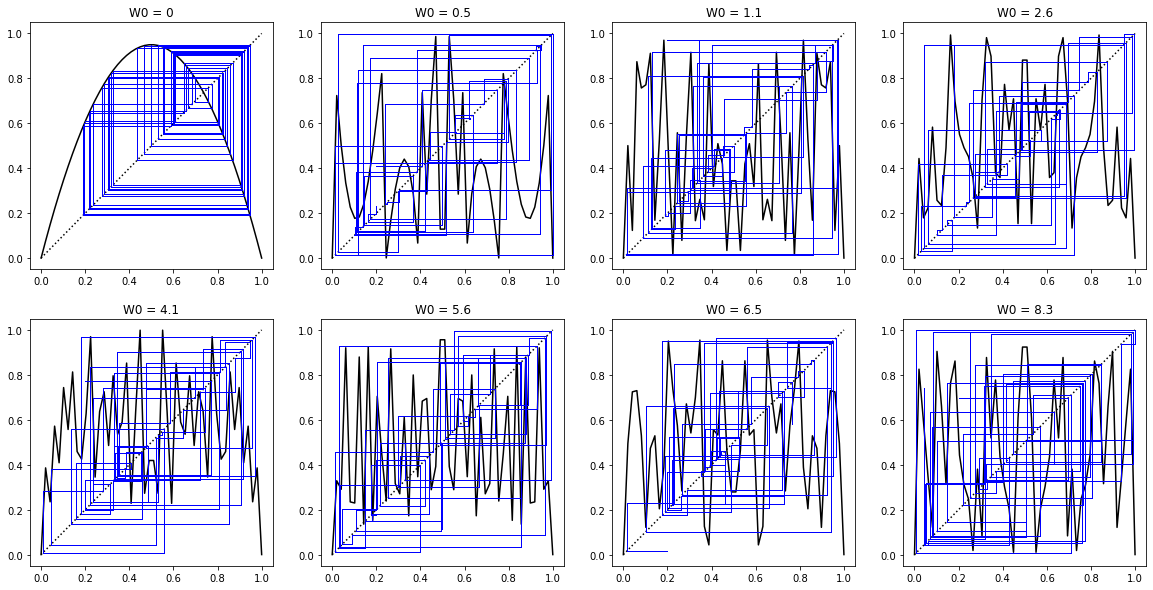

In [172]:
# plt.figure(figsize=(11,11))
f, ax = plt.subplots(2,4, figsize=(20,10))
cobwebPlot(ax=ax[0,0],w0=0)
cobwebPlot(ax=ax[0,1],w0=0.5)
cobwebPlot(ax=ax[0,2],w0=1.1)
cobwebPlot(ax=ax[0,3],w0=2.6)
cobwebPlot(ax=ax[1,0],w0=4.1)
cobwebPlot(ax=ax[1,1],w0=5.6)
cobwebPlot(ax=ax[1,2],w0=6.5)
cobwebPlot(ax=ax[1,3],w0=8.3)
plt.show()

In [127]:
c=5
a = np.array([1,2,3])
b = np.array([9, 8, 7, 6, 5])
np.power(np.multiply(a.reshape(3,1),b), np.array([1,2,3]).reshape(3,1))

array([[    9,     8,     7,     6,     5],
       [  324,   256,   196,   144,   100],
       [19683, 13824,  9261,  5832,  3375]])

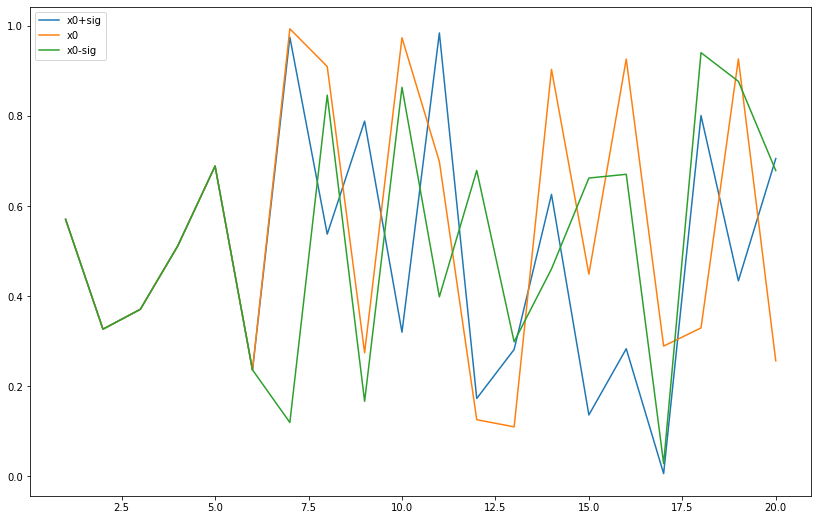

In [105]:
# Testing Chaos

x0,e0,w0,itr = 0.2,3.8,2.1,20
sig = 1e-16
plt.figure(figsize = (14, 9))
plt.plot(range(1, itr+1),chaos(x0+sig,w0,e0,itr), label = 'x0+sig')
plt.plot(range(1, itr+1),chaos(x0,w0,e0,itr), label = 'x0')
plt.plot(range(1, itr+1),chaos(x0-sig,w0,e0,itr), label = 'x0-sig')
plt.legend()

In [9]:
def iterL4(W,E,c,itr=20):
    X = np.zeros(itr+1)
    X[0] = c
    for i in range(itr):
        xMul = X[i]*(1-X[i])
        L = xMul*E
        nex = L[0]
        for j in range(1,4):
            for k in range(j+1):
                ind = int(k+(((j-1)*(j+2))/2))
                nex += W[ind]*(L[k]**(j+1-k))
        X[i+1] = nex%1
    return np.array(X[1:])

In [10]:
def genRK(sKey):
    sKey = np.array([ord(c) for c in sKey])
    temp = np.append(sKey,np.zeros(9-np.mod(len(sKey),9), dtype='uint8'))
    temp = temp.reshape(len(temp)//9,9)
    W = np.bitwise_xor.reduce(temp)/256
    temp = np.append(sKey,np.zeros(4-np.mod(len(sKey),4), dtype='uint8'))
    temp = temp.reshape(len(temp)//4,4)
    E = np.bitwise_xor.reduce(temp)/256
    E = 3.8+E/5
    RK = np.zeros(20)
    for c in sKey:
        RK += iterL4(W,E,c/256,20)
    RK = RK%1
    return RK,W,E

In [11]:
def genXMap(rk, W,E,size):
    xMap = iterL4(W,E,rk,size)
    return np.floor(xMap*255).astype('uint8')

In [12]:
def genPMap(rk,W,E,size,xMap):
    return np.argsort(xMap)

In [13]:
def genSMap(rk, W, E):
    sMap = iterL4(W,E,rk,256)
    return np.argsort(sMap).astype('uint8')

In [14]:
def rotateRight(arr, r):
    return np.bitwise_or(np.right_shift(arr,r),np.left_shift(arr,8-r))
def rotateLeft(arr, r):
    return np.bitwise_or(np.left_shift(arr,r),np.right_shift(arr,8-r))
def xnor(arr,r):
    return np.bitwise_not(np.bitwise_xor(arr,r))
def noop(arr,r):
    return arr
def nott(arr,r):
    return np.bitwise_not(arr)

In [15]:
functionList = [(rotateRight,rotateLeft), (rotateLeft, rotateRight), (noop, noop), (np.bitwise_xor,np.bitwise_xor), (nott, nott), (xnor, xnor)]

In [16]:
def DFLGen(rk,W,E):
    temp = iterL4(W,E,rk,6)
    temp = np.argsort(temp)
    return temp

In [70]:
def exchanger(img, sKey):
    RK,W,E = genRK(sKey)
    # eImg = np.stack((img[:,:,0].flatten(), img[:,:,1].flatten(), img[:,:,2].flatten()), axis = 1)
    eImg = img.reshape(-1, img.shape[-1])
    xMap = genXMap(RK[-1],W,E,len(eImg))
    pMap = genPMap(RK[-1],W,E,len(eImg),xMap)
    sMap = genSMap(RK[-1],W,E)
    funcOrd = DFLGen(RK[-1],W,E)
    eImg = eImg[pMap]
    eImg = sMap[eImg]
    eImg = np.bitwise_xor(eImg,np.stack((xMap,xMap,xMap), axis = 1))
    tempRK = np.round(RK).astype('uint8')
    for i in funcOrd:
        for rk in tempRK:
            eImg=functionList[i][0](eImg,rk)
    return eImg.reshape(img.shape).astype('uint8')

In [71]:
def dexchanger(img,sKey):
    RK,W,E = genRK(sKey)
    # eImg = np.stack((img[:,:,0].flatten(), img[:,:,1].flatten(), img[:,:,2].flatten()), axis = 1)
    eImg = img.reshape(-1, img.shape[-1])
    xMap = genXMap(RK[-1],W,E,len(eImg))
    pMap = genPMap(RK[-1],W,E,len(eImg),xMap)
    sMap = genSMap(RK[-1],W,E)
    funcOrd = DFLGen(RK[-1],W,E)[::-1]
    tempRK = np.round(RK).astype('uint8')
    for i in funcOrd:
        for rk in tempRK:
            eImg=functionList[i][1](eImg,rk)
    eImg = np.bitwise_xor(eImg,np.stack((xMap,xMap,xMap), axis = 1))
    nPMap = np.zeros_like(pMap)
    nSMap = np.zeros_like(sMap)
    for (i,t) in enumerate(pMap):
        nPMap[t] = i
    for (i,t) in enumerate(sMap):
        nSMap[t] = i
    eImg = nSMap[eImg]
    eImg = eImg[nPMap]
    return eImg.reshape(img.shape).astype('uint8')

In [72]:
class coverImage:
    def __init__(self):
        self.muls = [192, 48, 12, 3]
        self.rmul = 252
        self.rhmul = 3
    def hideImg(self, img, ref):
        ref = cv2.resize(ref, (img.shape[0]*2, img.shape[1]*2))
        rs = ref.shape
        # ref = np.bitwise_and(np.stack((ref[:,:,0].flatten(), ref[:,:,1].flatten(), ref[:,:,2].flatten()), axis = 1), self.rmul)
        ref = np.bitwise_and(ref.reshape(-1, ref.shape[-1]), self.rmul)
        # img = np.stack((img[:,:,0].flatten(), img[:,:,1].flatten(), img[:,:,2].flatten()), axis = 1)
        img = img.reshape(-1, img.shape[-1])
        for i in range(img.shape[0]):
            # ri = i*4 + 3
            ri = i*4
            for j in range(4):
                # ref[ri+j] = np.bitwise_or(ref[ri+j],np.right_shift(np.bitwise_and(img[i], self.muls[j]),((3-j)*2)))
                ref[ri+j] = np.bitwise_or(ref[ri+j],np.bitwise_and(np.right_shift(img[i],(3-j)*2), self.rhmul))
                # ref[ri-j] = np.bitwise_or(ref[ri-j],np.bitwise_and(img[i], self.rhmul))
                # img[i] = np.right_shift(img[i],2)
            # ref[ri-3] = np.bitwise_or(ref[ri-3],np.bitwise_and(img[i], self.rhmul))
        return ref.reshape(rs)
    def unHideImg(self, img):
        rs = img.shape
        # img = np.bitwise_and(np.stack((img[:,:,0].flatten(), img[:,:,1].flatten(), img[:,:,2].flatten()), axis = 1), self.rhmul)
        img = np.bitwise_and(img.reshape(-1,img.shape[-1]), self.rhmul)
        uImg = np.zeros((img.shape[0]//4, 3), dtype='uint8')
        for i in range(uImg.shape[0]):
            ri = i*4
            for j in range(3):
                uImg[i] = np.left_shift(np.bitwise_or(uImg[i], img[ri+j]),2)
            uImg[i] = np.bitwise_or(uImg[i], img[ri+3])
        return uImg.reshape((rs[0]//2, rs[1]//2, 3))

In [73]:
sKey = 'This is a simple key'

In [74]:
teBegin = time.time()
huClass = coverImage()
eImg = exchanger(img, sKey)
ehImg = huClass.hideImg(eImg, ref)
print(time.time()-teBegin)

20.699700593948364


In [75]:
tdBegin = time.time()
dImg = dexchanger(huClass.unHideImg(ehImg), sKey)
print(time.time()-tdBegin)

16.303147077560425


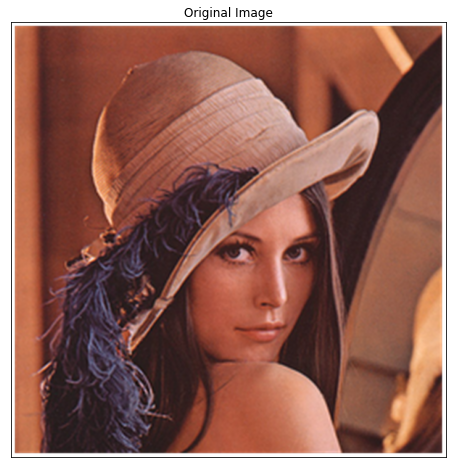

In [76]:
showImage(img, 'Original Image')

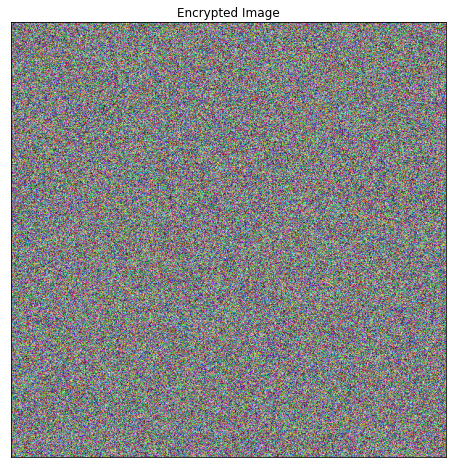

In [77]:
showImage(eImg, 'Encrypted Image')

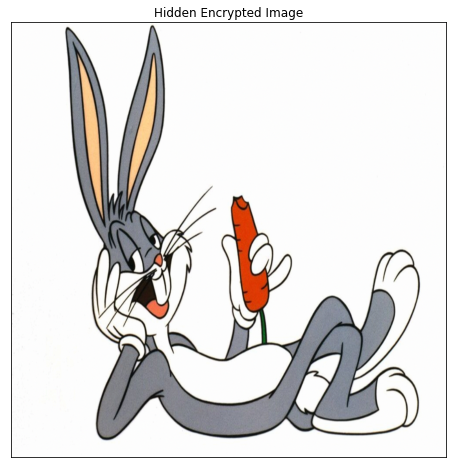

In [78]:
showImage(ehImg, 'Hidden Encrypted Image')

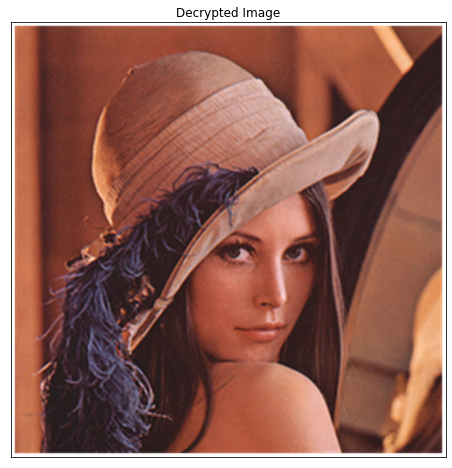

In [79]:
showImage(dImg, 'Decrypted Image')